# 1 라이브러리 및 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
!pip install koreanize-matplotlib
import koreanize_matplotlib

from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("/home/kdt-admin/data/data.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,strd_yymm,tourp_dv_val,tourp_nm,vstr_typ_dv_val,vstr_num
0,202007,A01,"BIFF광장, 용두산공원, 보수동책방골목",10대,18170
1,202007,A01,"BIFF광장, 용두산공원, 보수동책방골목",20대,101245
2,202007,A01,"BIFF광장, 용두산공원, 보수동책방골목",30대,84004
3,202007,A01,"BIFF광장, 용두산공원, 보수동책방골목",40대,82945
4,202007,A01,"BIFF광장, 용두산공원, 보수동책방골목",50대,74258
...,...,...,...,...,...
8269,202309,B16,UN기념공원,20대,21519
8270,202309,B16,UN기념공원,30대,5993
8271,202309,B16,UN기념공원,40대,4930
8272,202309,B16,UN기념공원,50대,4077


# 2 EDA

## 2.1 관광지 구분 값과 관광지명 매핑

In [3]:
df['tourp_nm'].unique()

array(['BIFF광장, 용두산공원, 보수동책방골목', '감천문화마을', '광안리 해수욕장', '국립해양박물관',
       '다대포 해수욕장(꿈의 낙조분수,몰운대)', '달맞이고개', '동백섬, 누리마루APEC하우스', '렛츠런파크',
       '마린시티 카페거리', '민락수변공원', '범어사', '부산 서면', '부산시민공원', '센텀시티(신세계센텀 등)',
       '일광 해수욕장', '송도 해수욕장', '송정 해수욕장', '아미산전망대', '오륙도&이기대 갈맷길', '을숙도',
       '자갈치, 국제시장, 부평깡통야시장', '전포카페거리', '태종대', '해동 용궁사', '해운대 해수욕장',
       '황령산 봉수대', '흰여울문화마을', '임랑 해수욕장', 'BIFF광장 일원', '다대포 해수욕장', '동백섬 일원',
       '마린시티', '센텀시티', '아미산 전망대', '오륙도_이기대 갈맷길', '자갈치_국제시장', '해리단길',
       '청사포', '낙동강생태공원', '기장해변_대변항', '오시리아', '해운대시장', '암남공원', '죽성드림세트장',
       '가덕도', '부산민주공원', '장림포구', '장산', '부산역_초량', '수영사적공원_망미단길', '동래온천',
       'UN기념공원'], dtype=object)

In [4]:
df['tourp_nm'] = df['tourp_nm'].replace('BIFF광장, 용두산공원, 보수동책방골목', 'BIFF광장 일원')
df['tourp_nm'] = df['tourp_nm'].replace('다대포 해수욕장(꿈의 낙조분수,몰운대)', '다대포 해수욕장')
df['tourp_nm'] = df['tourp_nm'].replace('동백섬, 누리마루APEC하우스', '동백섬 일원')
df['tourp_nm'] = df['tourp_nm'].replace('마린시티 카페거리', '마린시티')
df['tourp_nm'] = df['tourp_nm'].replace('센텀시티(신세계센텀 등)', '센텀시티')
df['tourp_nm'] = df['tourp_nm'].replace('아미산 전망대', '아미산전망대')
df['tourp_nm'] = df['tourp_nm'].replace('오륙도&이기대 갈맷길', '오륙도_이기대 갈맷길')
df['tourp_nm'] = df['tourp_nm'].replace('자갈치, 국제시장, 부평깡통야시장', '자갈치_국제시장')

In [5]:
df['tourp_nm'].unique()

array(['BIFF광장 일원', '감천문화마을', '광안리 해수욕장', '국립해양박물관', '다대포 해수욕장', '달맞이고개',
       '동백섬 일원', '렛츠런파크', '마린시티', '민락수변공원', '범어사', '부산 서면', '부산시민공원',
       '센텀시티', '일광 해수욕장', '송도 해수욕장', '송정 해수욕장', '아미산전망대', '오륙도_이기대 갈맷길',
       '을숙도', '자갈치_국제시장', '전포카페거리', '태종대', '해동 용궁사', '해운대 해수욕장',
       '황령산 봉수대', '흰여울문화마을', '임랑 해수욕장', '해리단길', '청사포', '낙동강생태공원',
       '기장해변_대변항', '오시리아', '해운대시장', '암남공원', '죽성드림세트장', '가덕도', '부산민주공원',
       '장림포구', '장산', '부산역_초량', '수영사적공원_망미단길', '동래온천', 'UN기념공원'],
      dtype=object)

In [6]:
df['tourp_nm'].nunique()

44

## 2.2 데이터 탐색

In [7]:
# 데이터 속성 확인
df.shape

(8274, 5)

### Column
 * strd_yymm: 기준년월
 * tourp_dv_val: 관광지구분값
 * tourp_nm: 관광지명
 * vstr_typ_dv_val: 방문자유형구분값
 * vstr_num: 방문자수

In [8]:
# 데이터 샘플 확인 (상위 5개)
df.head()

,strd_yymm,tourp_dv_val,tourp_nm,vstr_typ_dv_val,vstr_num
0,202007,A01,BIFF광장 일원,10대,18170
1,202007,A01,BIFF광장 일원,20대,101245
2,202007,A01,BIFF광장 일원,30대,84004
3,202007,A01,BIFF광장 일원,40대,82945
4,202007,A01,BIFF광장 일원,50대,74258


In [9]:
# 데이터 샘플 확인 (하위 5개)
df.tail()

,strd_yymm,tourp_dv_val,tourp_nm,vstr_typ_dv_val,vstr_num
8269,202309,B16,UN기념공원,20대,21519
8270,202309,B16,UN기념공원,30대,5993
8271,202309,B16,UN기념공원,40대,4930
8272,202309,B16,UN기념공원,50대,4077
8273,202309,B16,UN기념공원,60대,2419


In [10]:
# 결측치 확인
df.isnull().sum()

strd_yymm          0
tourp_dv_val       0
tourp_nm           0
vstr_typ_dv_val    0
vstr_num           0
dtype: int64

In [11]:
# 컬럼 형태(type) 확인
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8274 entries, 0 to 8273
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   strd_yymm        8274 non-null   int64 
 1   tourp_dv_val     8274 non-null   object
 2   tourp_nm         8274 non-null   object
 3   vstr_typ_dv_val  8274 non-null   object
 4   vstr_num         8274 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 323.3+ KB


In [12]:
# 기초통계 확인 (수치형)
df.describe()

,strd_yymm,vstr_num
count,8274.000000,8274.000000
mean,202186.529732,20968.550157
std,97.762176,33469.575413
min,202007.000000,2.000000
25%,202107.000000,3788.250000
50%,202206.000000,8890.000000
75%,202302.000000,23378.500000
max,202309.000000,459122.000000


In [13]:
# 기초통계 확인 (범주형)
df.describe(include='object')

,tourp_dv_val,tourp_nm,vstr_typ_dv_val
count,8274,8274,8274
unique,44,44,6
top,A01,BIFF광장 일원,30대
freq,234,234,1380


# 3 시각화

## 3.1 히트맵(Heatmap)

<ipython-input-14-3e9845082dc9>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), square=True, linecolor='white', annot=True, annot_kws = {'size':10});


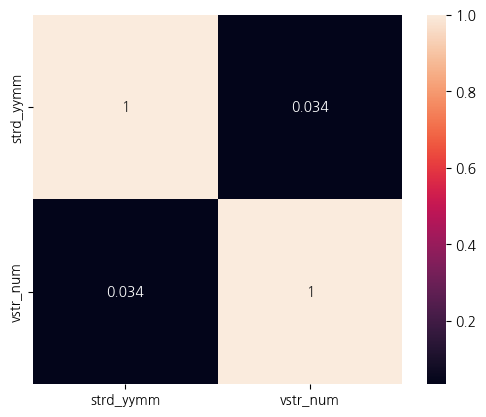

In [14]:
# heatmap
df_corr = df[['strd_yymm', 'vstr_num']]
corr_matrix = df_corr.corr()
sns.heatmap(corr_matrix, square=True, linecolor='white', annot=True, annot_kws={'size': 10})

## 3.2 산점도 그래프(상관관계 및 분포 확인)

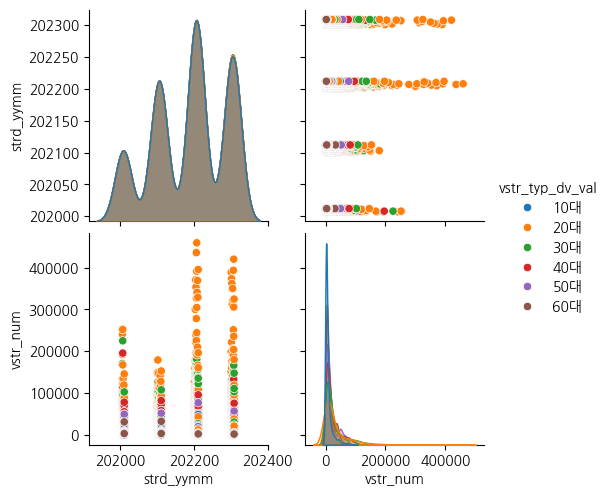

In [15]:
sns.pairplot(df, hue = 'vstr_typ_dv_val');

## 3.3 막대 그래프(bar plot)

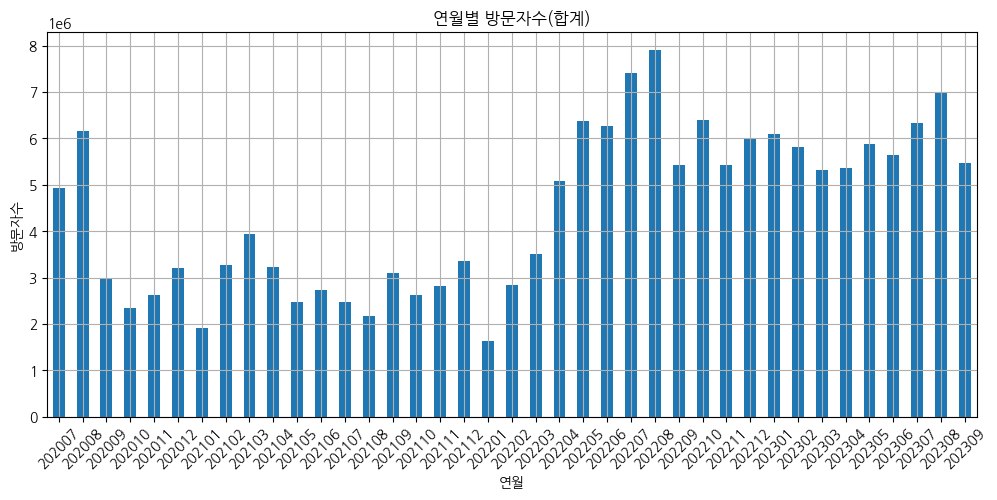

In [16]:
# 연월(year_month)별 방문자수(vstr_num)를 그룹화하여 합계 계산
monthly_visitors = df.groupby('strd_yymm')['vstr_num'].sum()

plt.figure(figsize=(12, 5))
monthly_visitors.plot(kind='bar')
plt.xlabel('연월')
plt.ylabel('방문자수')
plt.title('연월별 방문자수(합계)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

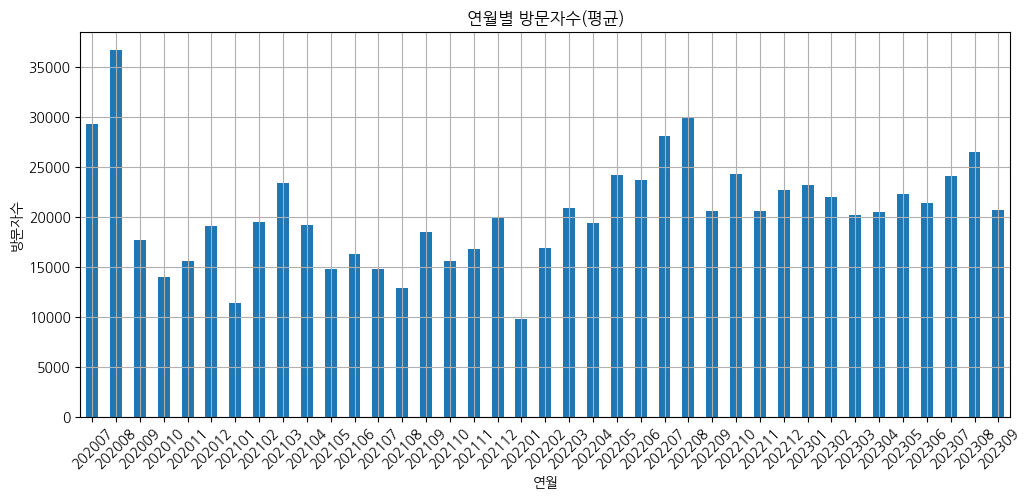

In [17]:
# 연월(year_month)별 방문자수(vstr_num)를 그룹화하여 합계 계산
monthly_visitors = df.groupby('strd_yymm')['vstr_num'].mean()

plt.figure(figsize=(12, 5))
monthly_visitors.plot(kind='bar')
plt.xlabel('연월')
plt.ylabel('방문자수')
plt.title('연월별 방문자수(평균)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

## 3.4 산점도 그래프(관광지별 방문자수와 연령대별)

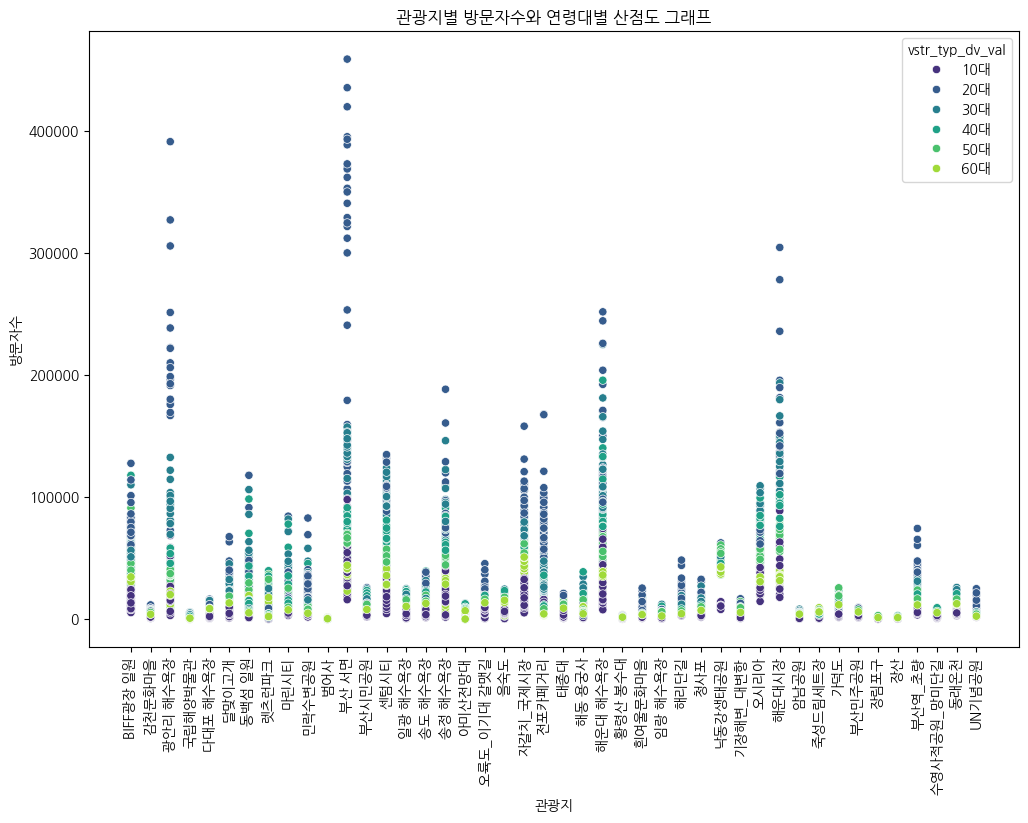

In [18]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='tourp_nm', y='vstr_num', hue='vstr_typ_dv_val', palette='viridis')
plt.xlabel('관광지')
plt.ylabel('방문자수')
plt.title('관광지별 방문자수와 연령대별 산점도 그래프')
plt.xticks(rotation=90)  # x축 레이블을 90도 회전하여 보기 편하게 만듭니다.
plt.show()

## 3.5 관광지별 연령별 연도에 따른 변화 확인

In [19]:
# 관광지에 따라(0~43) 시각화를 보여줄 수 있는 함수 생성
def plot_data(number):
    x = df['tourp_nm'].unique()[number]
    tour = df[df['tourp_nm'] == f'{x}']
    for ages in range(10, 61, 10):
        try:
            tours = tour[tour['vstr_typ_dv_val'] == f'{ages}대']
            if not tours.empty:
                ages_plot = str(tours['vstr_typ_dv_val'].unique()[0])
                plt.figure(figsize=(30, 15))
                ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
                for p in ax.patches:
                    ax.text(p.get_x() + (p.get_width() / 2), p.get_y() + p.get_height(),
                            f"{p.get_height():.0f}", ha='center')
                plt.title(f"연도별 {x} {ages}대 관광객 수")
                plt.xlabel(f"{ages_plot}")
                plt.ylabel("Counts")
                plt.show()
        except KeyError:
            continue

<ipython-input-19-eb7927edd654>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: UserWarning: 
The palette list has fewer values (9) than needed (39) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)


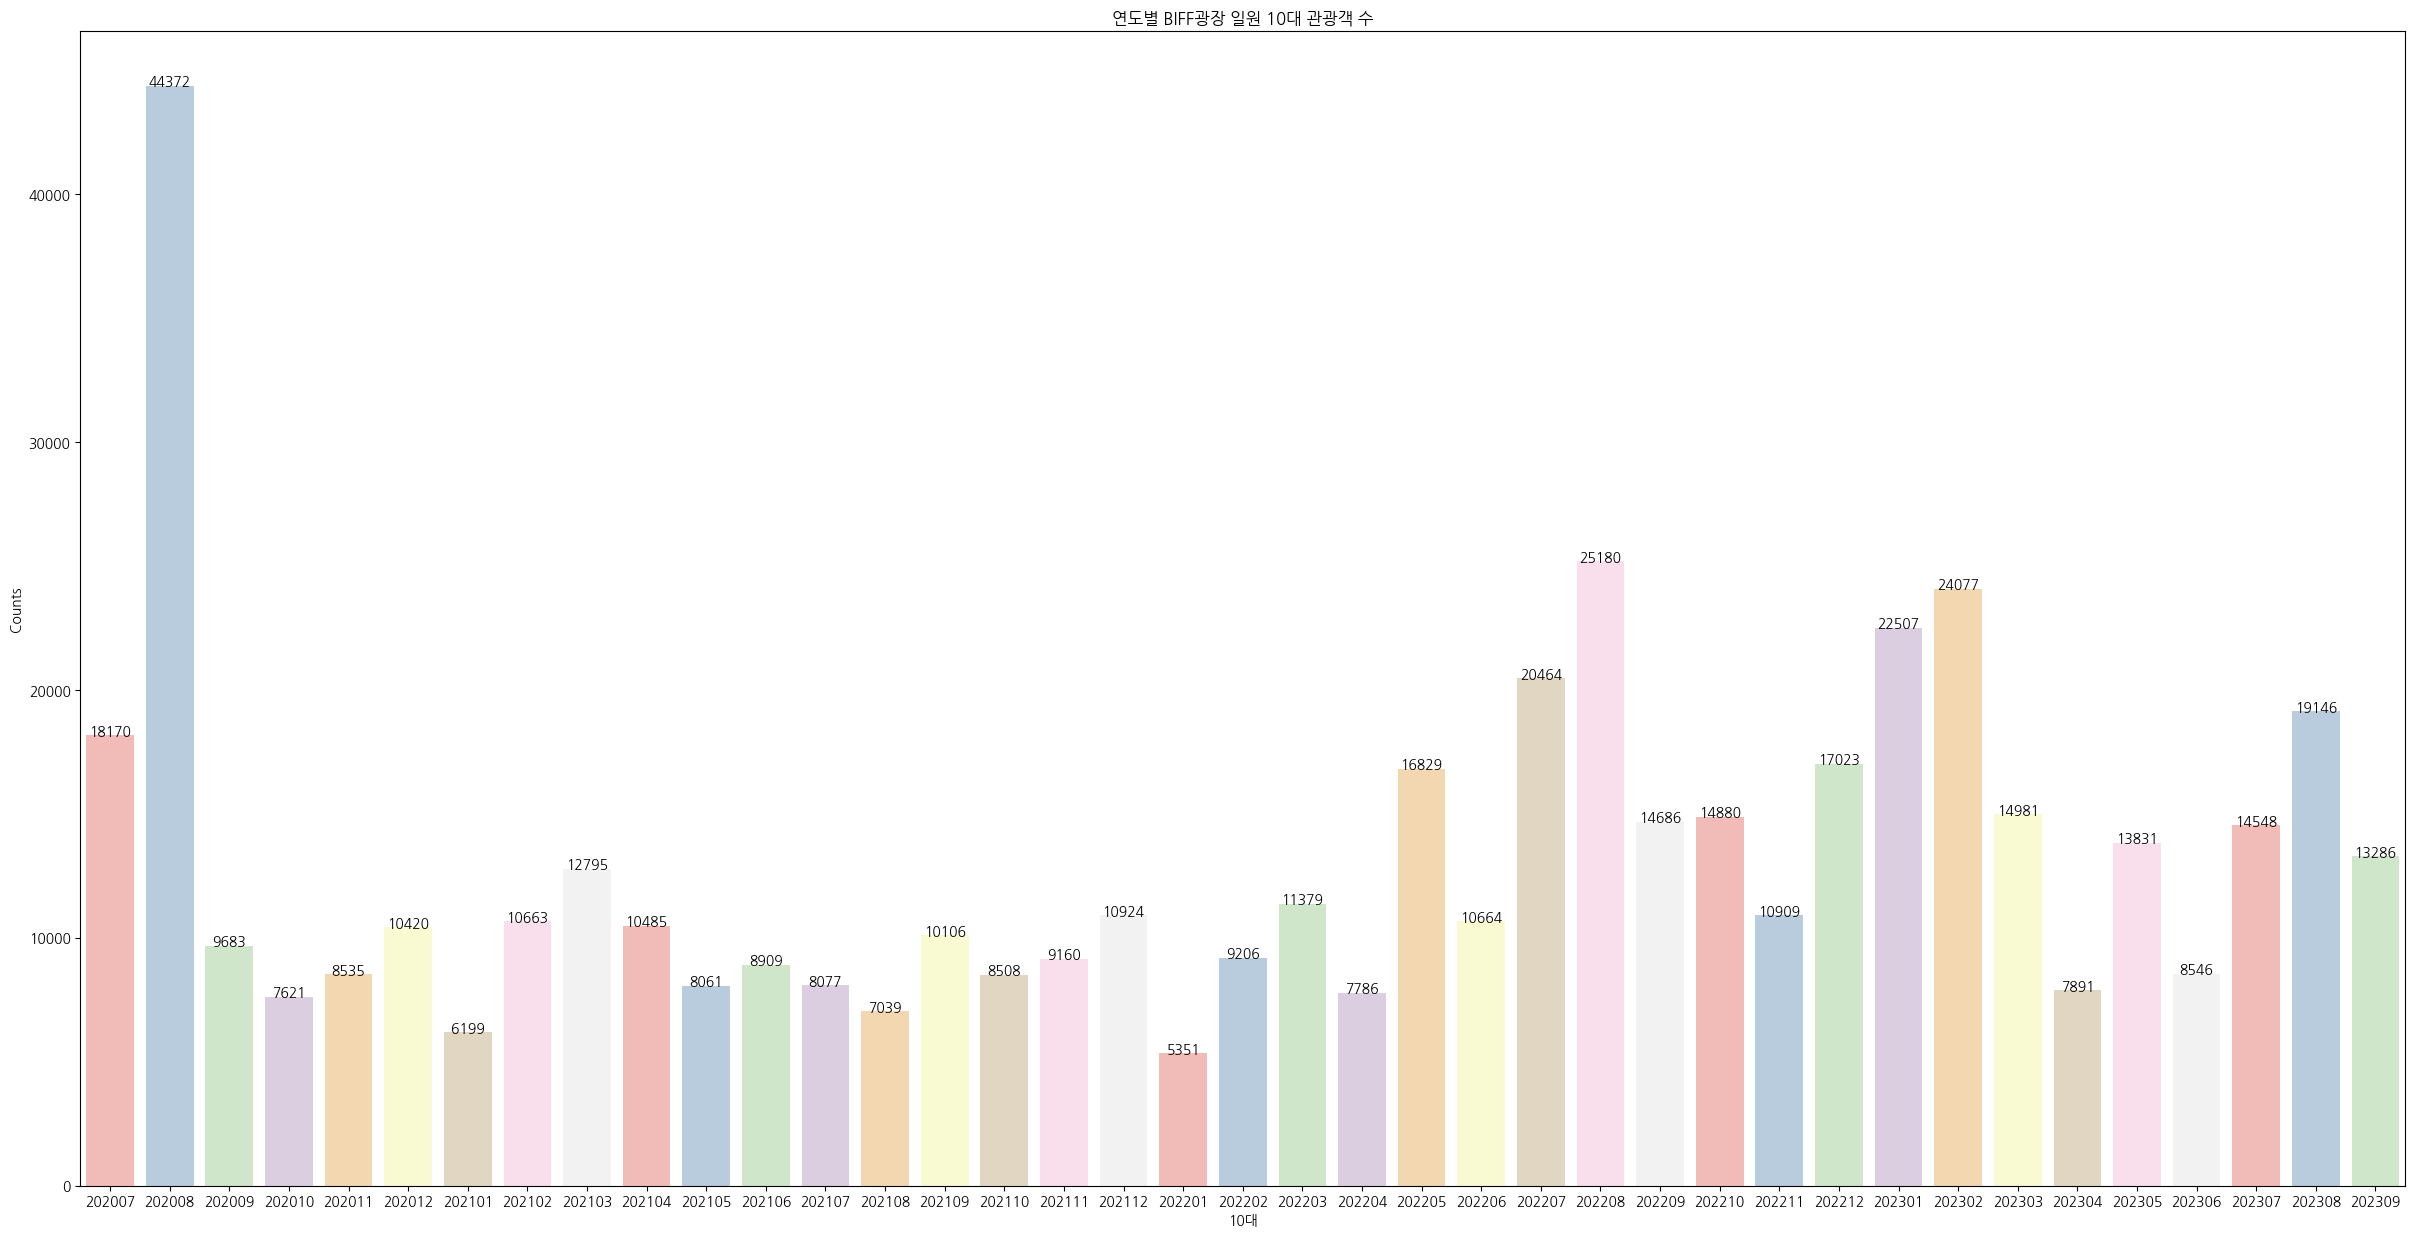

<ipython-input-19-eb7927edd654>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: UserWarning: 
The palette list has fewer values (9) than needed (39) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)


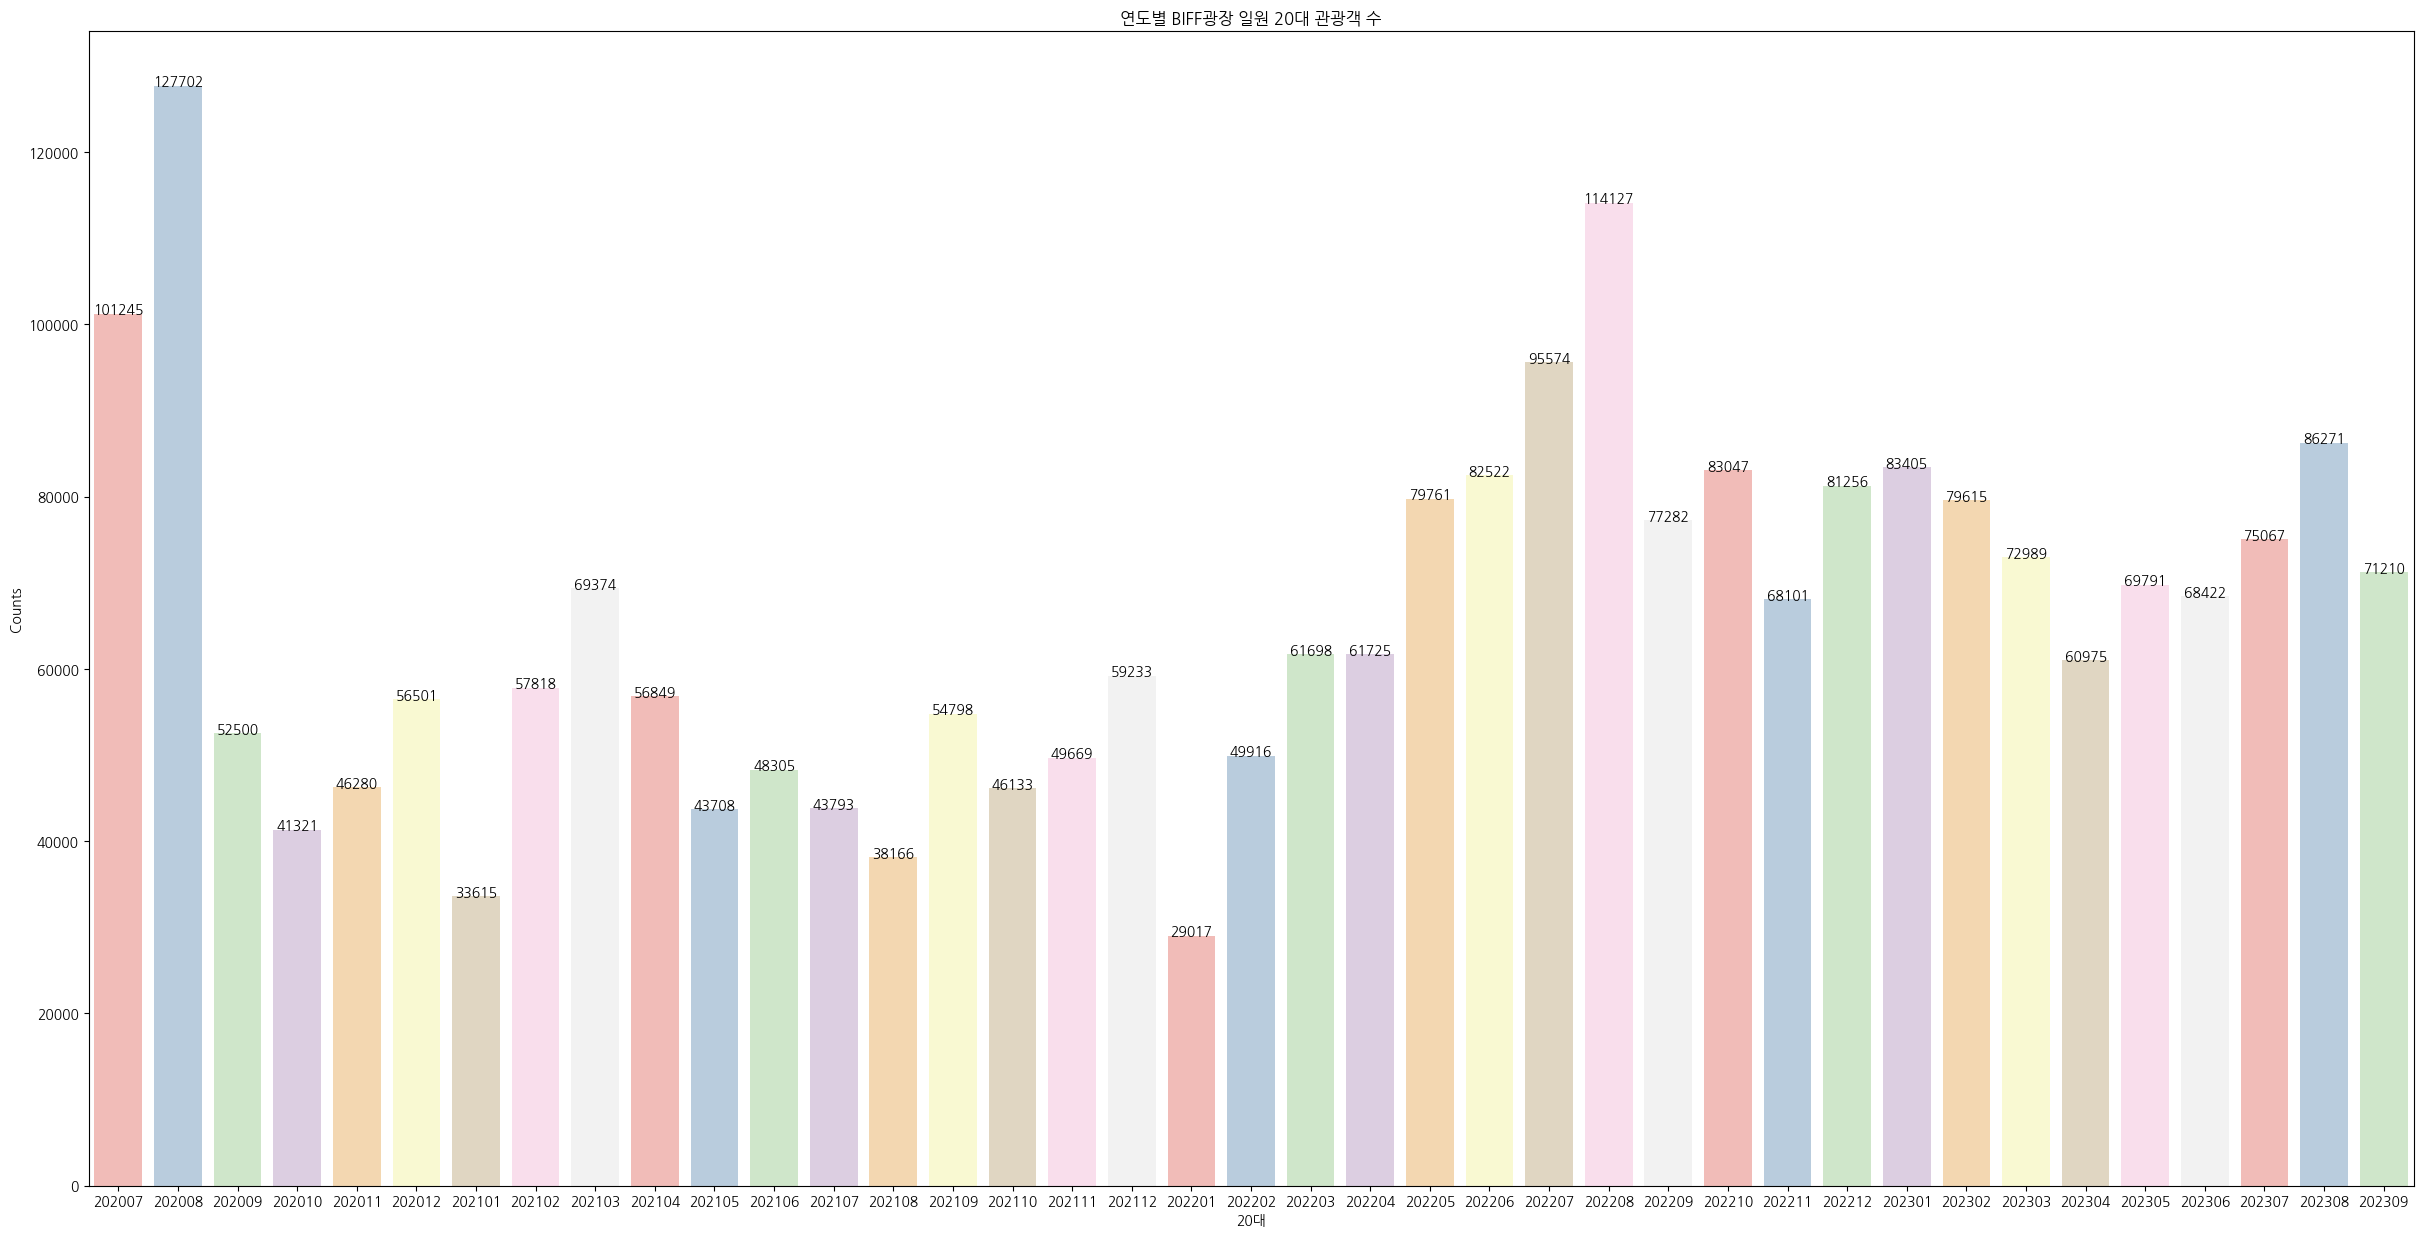

<ipython-input-19-eb7927edd654>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: UserWarning: 
The palette list has fewer values (9) than needed (39) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)


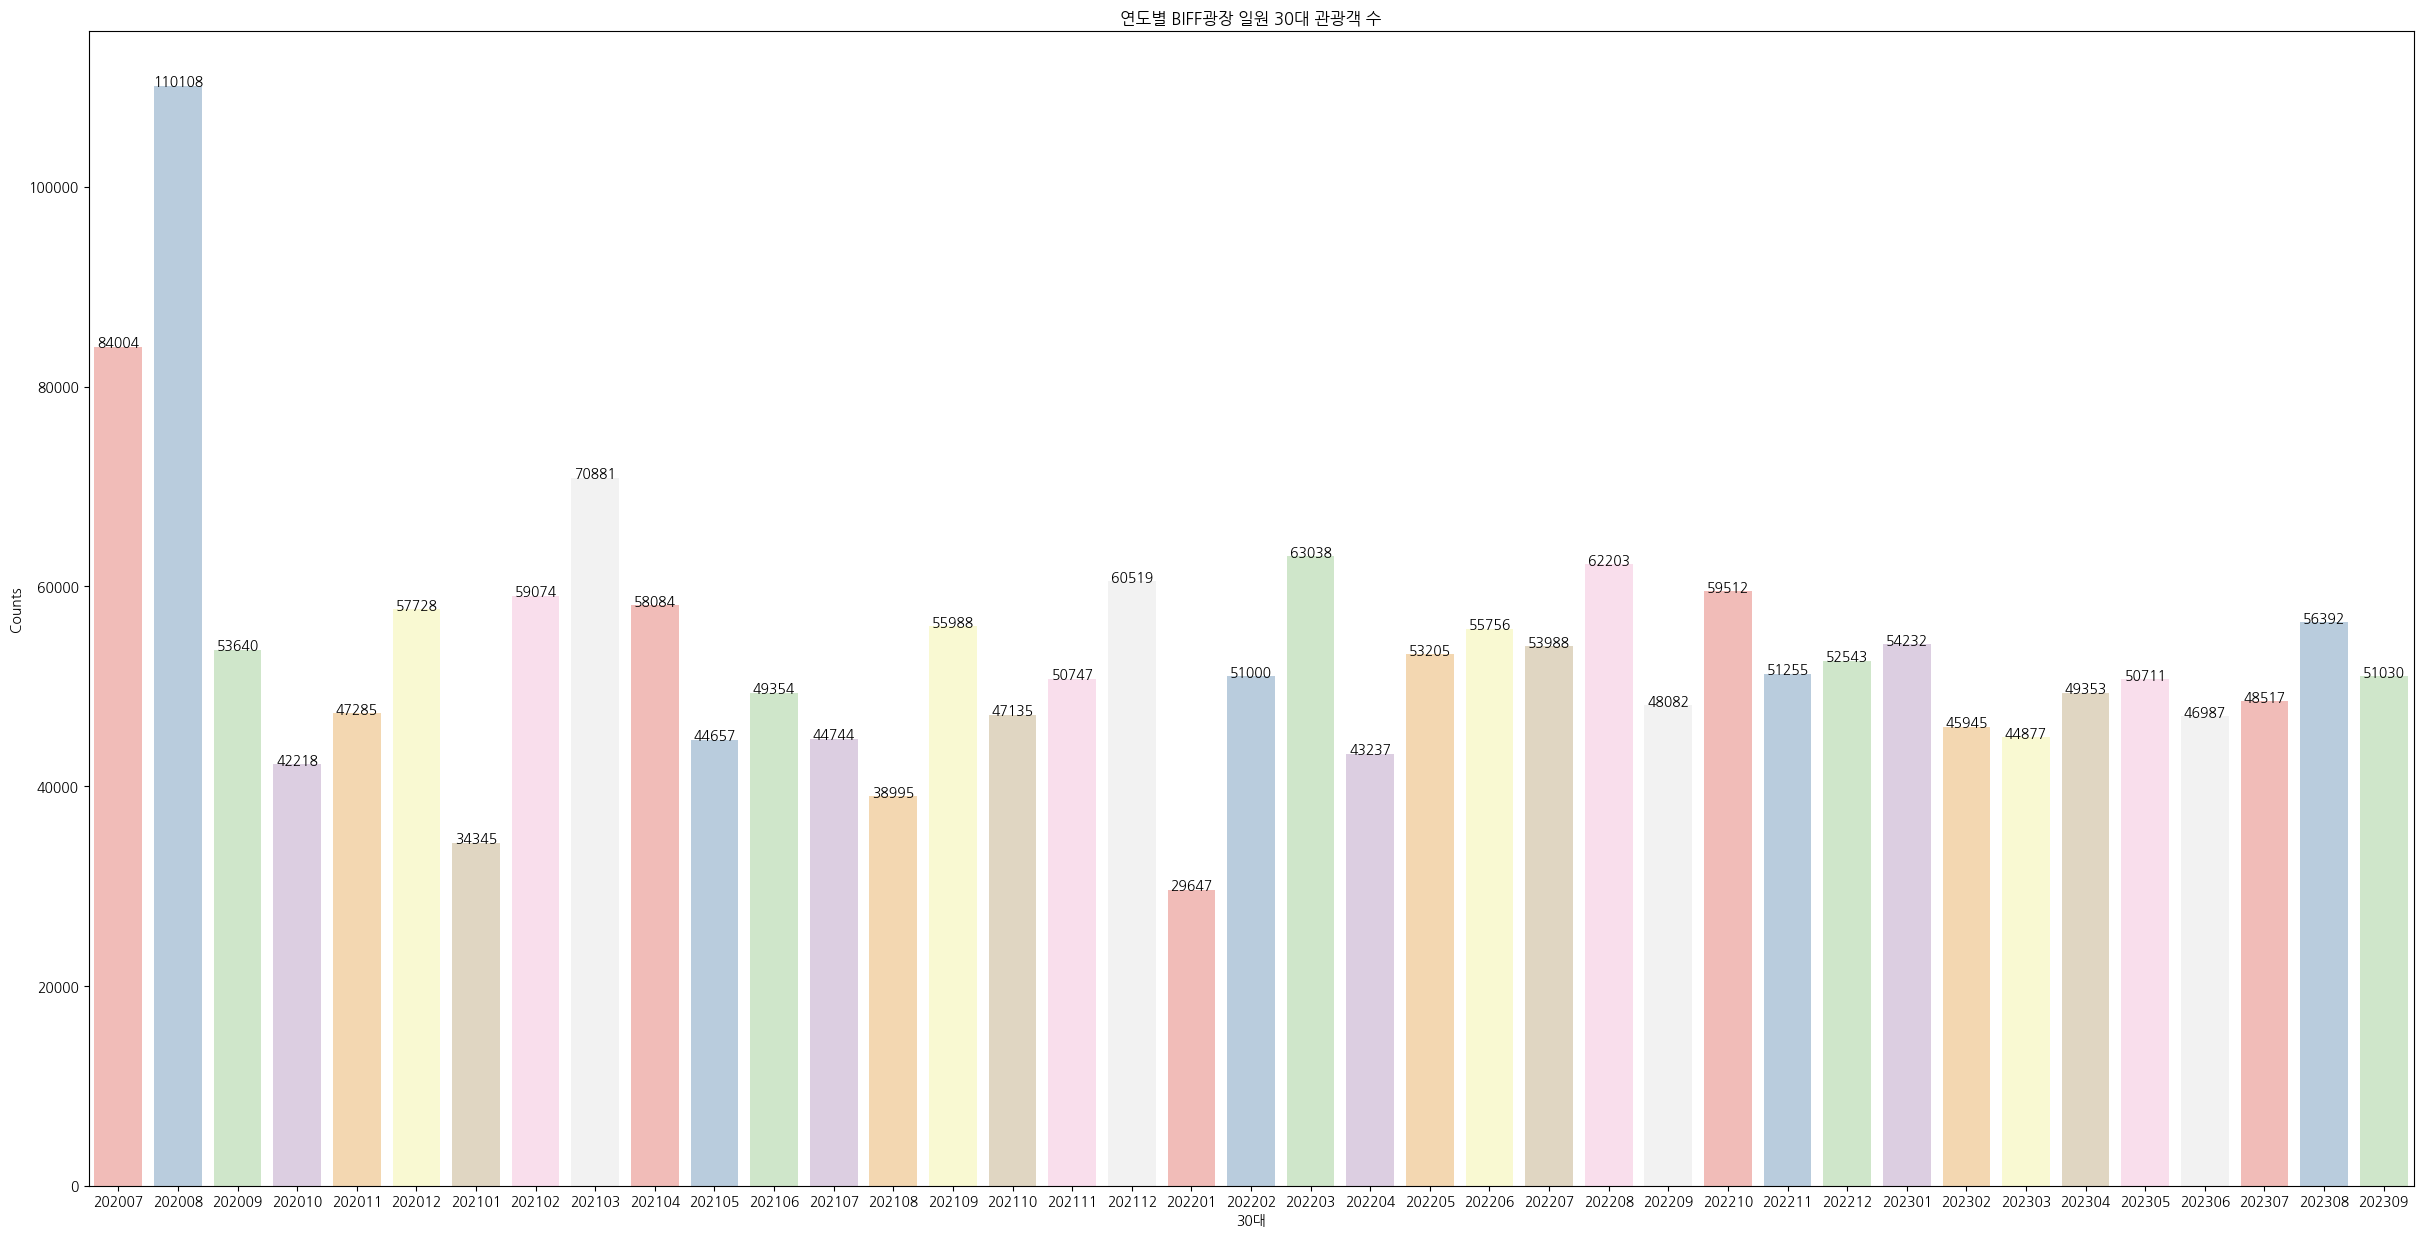

<ipython-input-19-eb7927edd654>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: UserWarning: 
The palette list has fewer values (9) than needed (39) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)


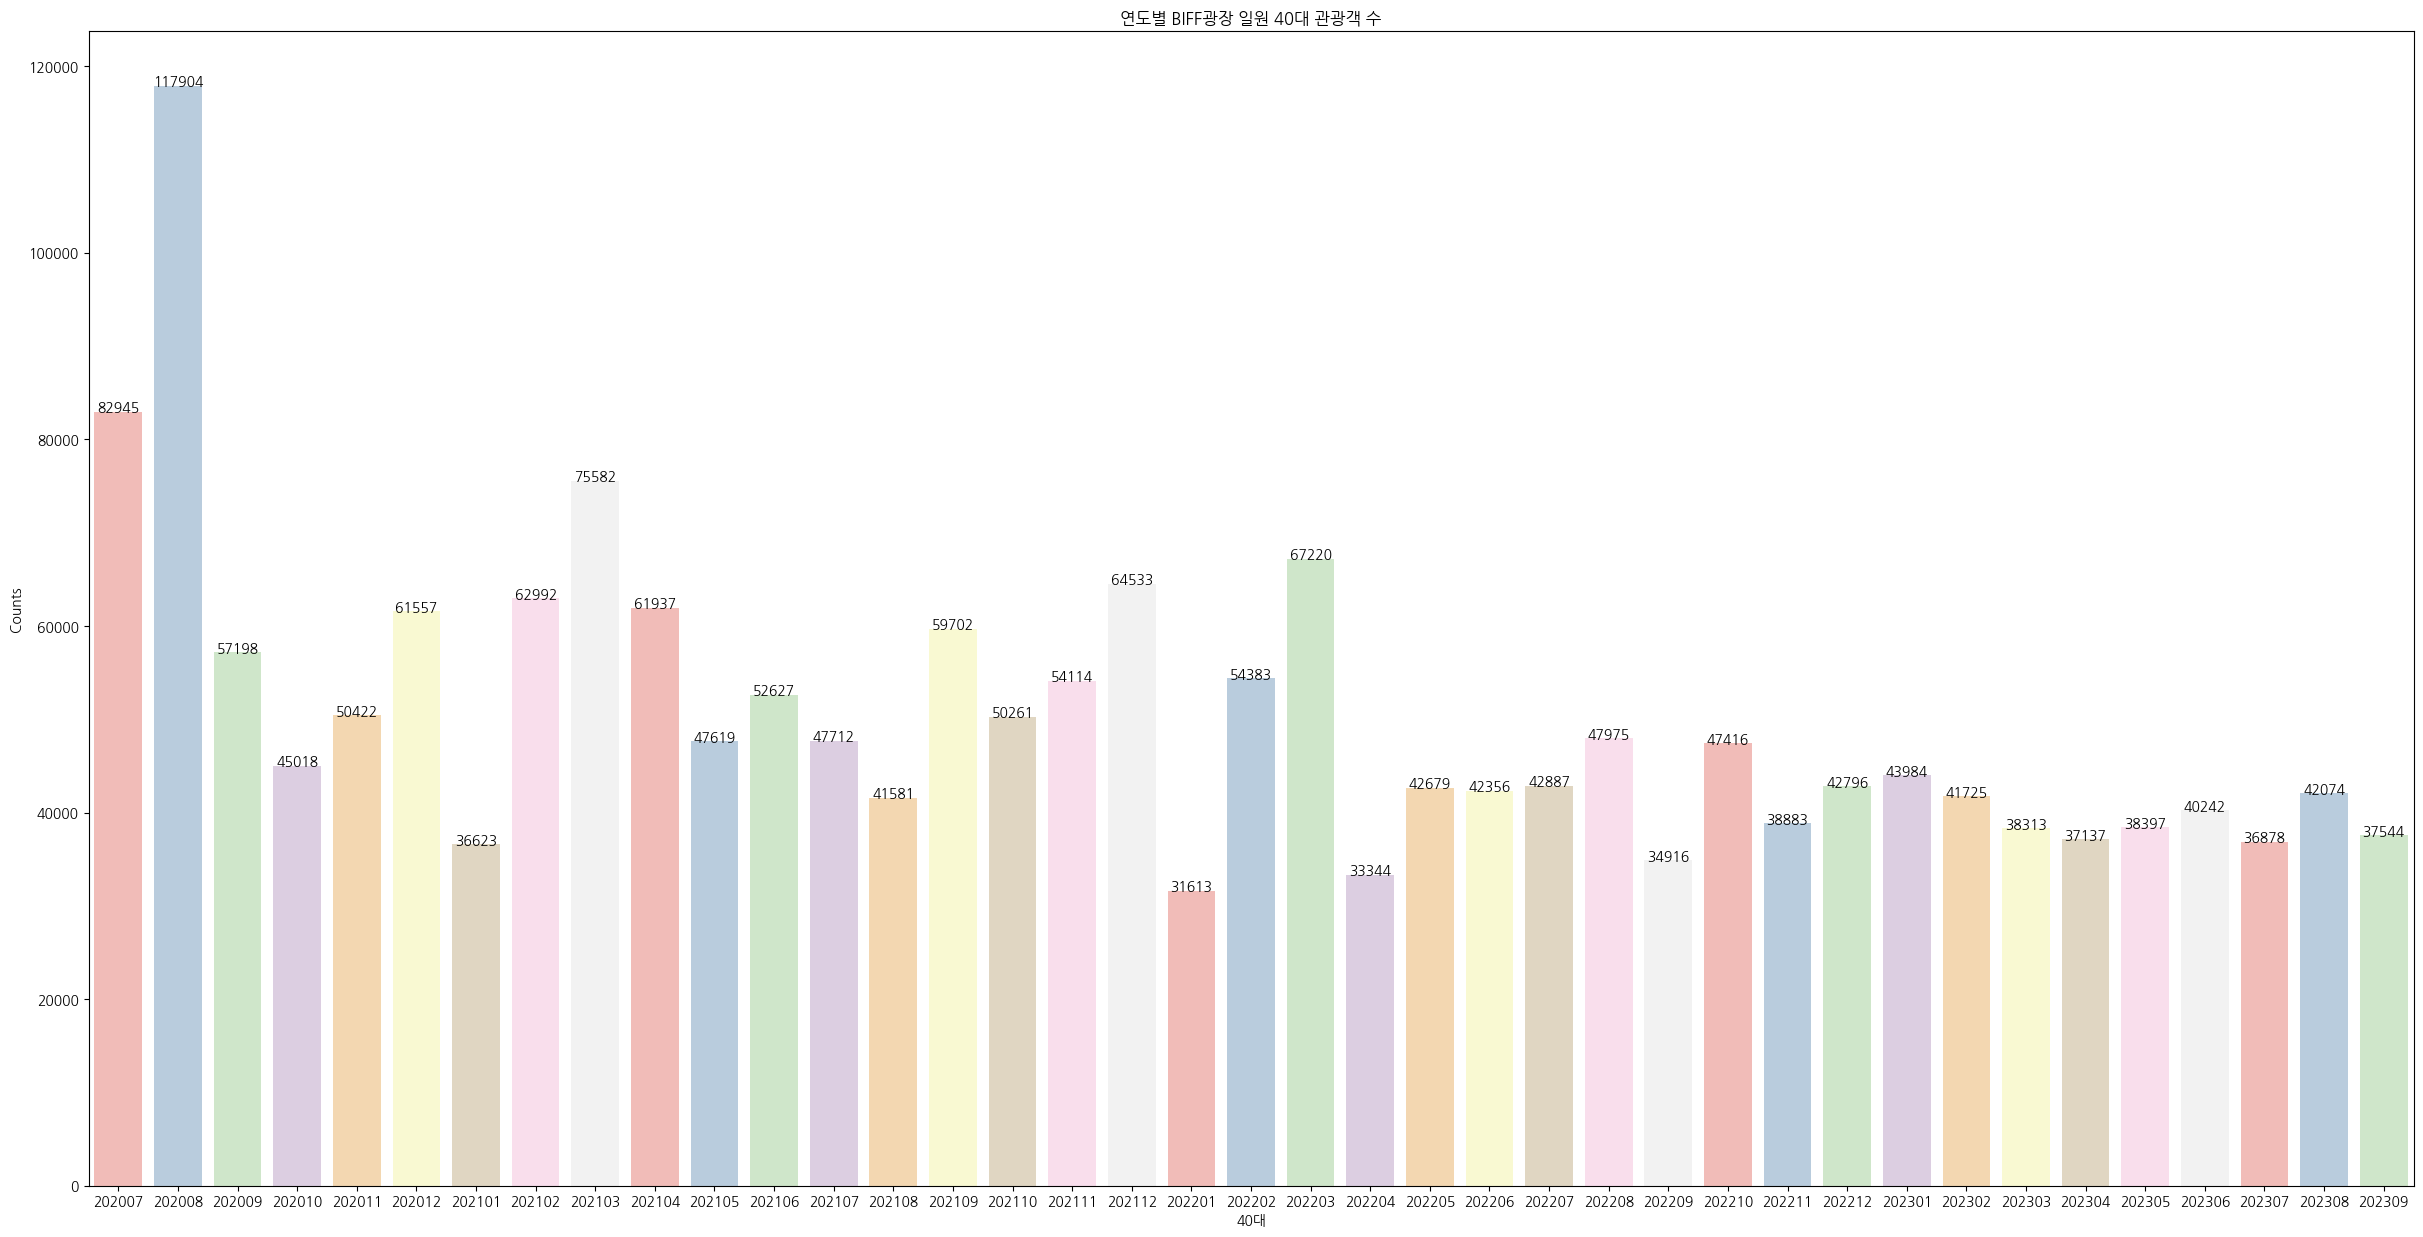

<ipython-input-19-eb7927edd654>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: UserWarning: 
The palette list has fewer values (9) than needed (39) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)


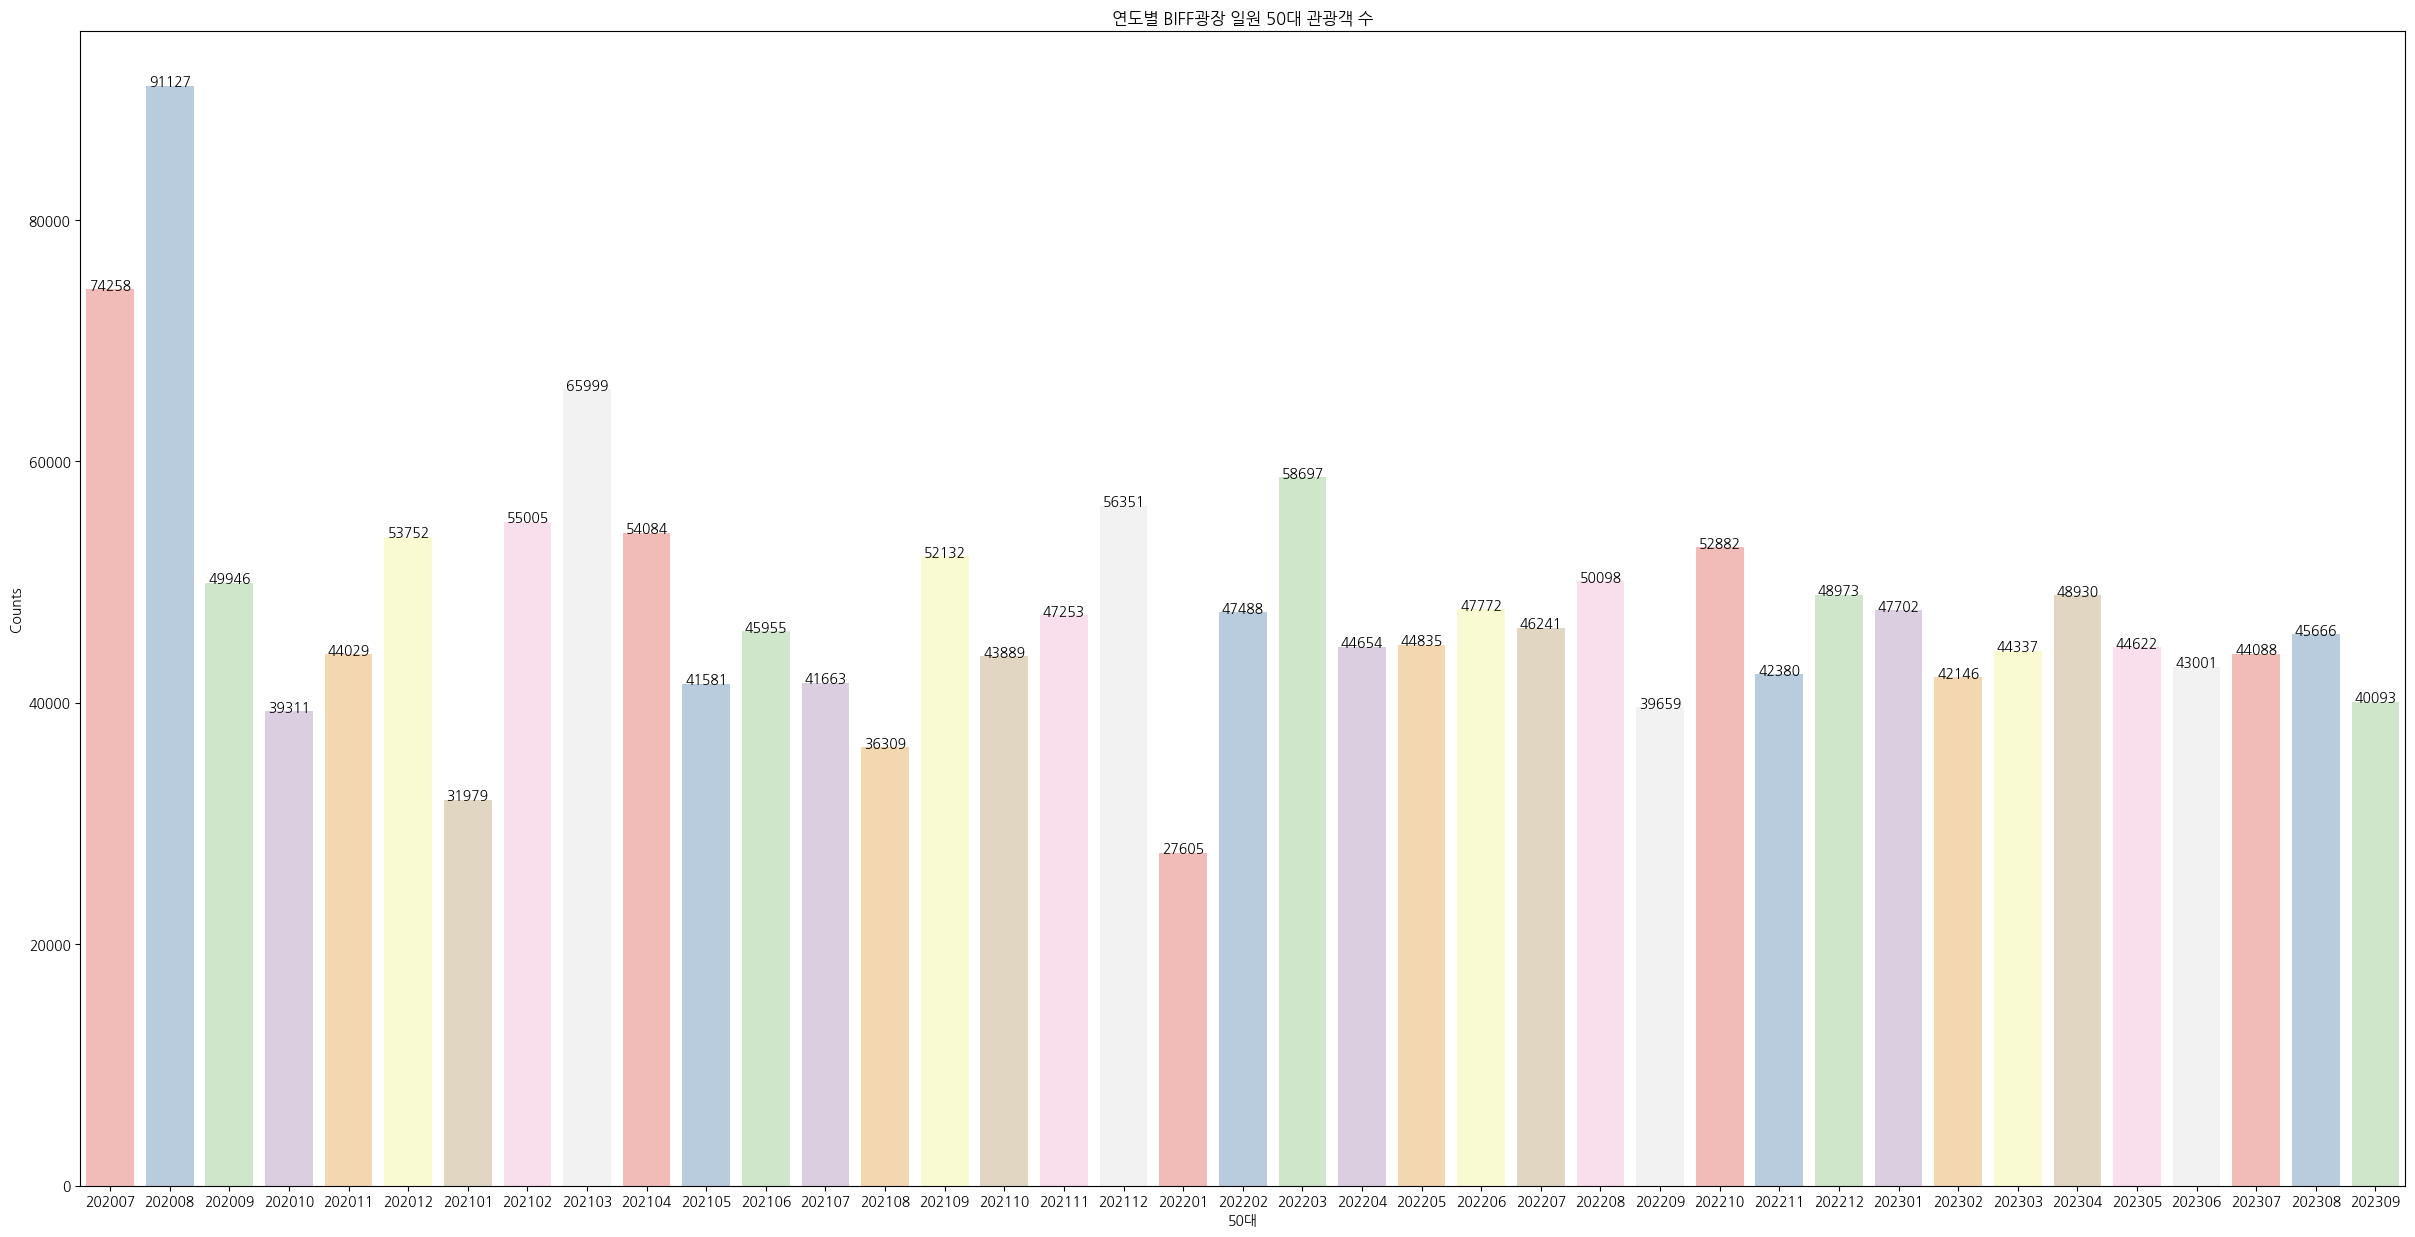

<ipython-input-19-eb7927edd654>:11: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)
<ipython-input-19-eb7927edd654>:11: UserWarning: 
The palette list has fewer values (9) than needed (39) and will cycle, which may produce an uninterpretable plot.
  ax = sns.barplot(data=tours, x='strd_yymm', y='vstr_num', palette=sns.color_palette("Pastel1"), ci=None)


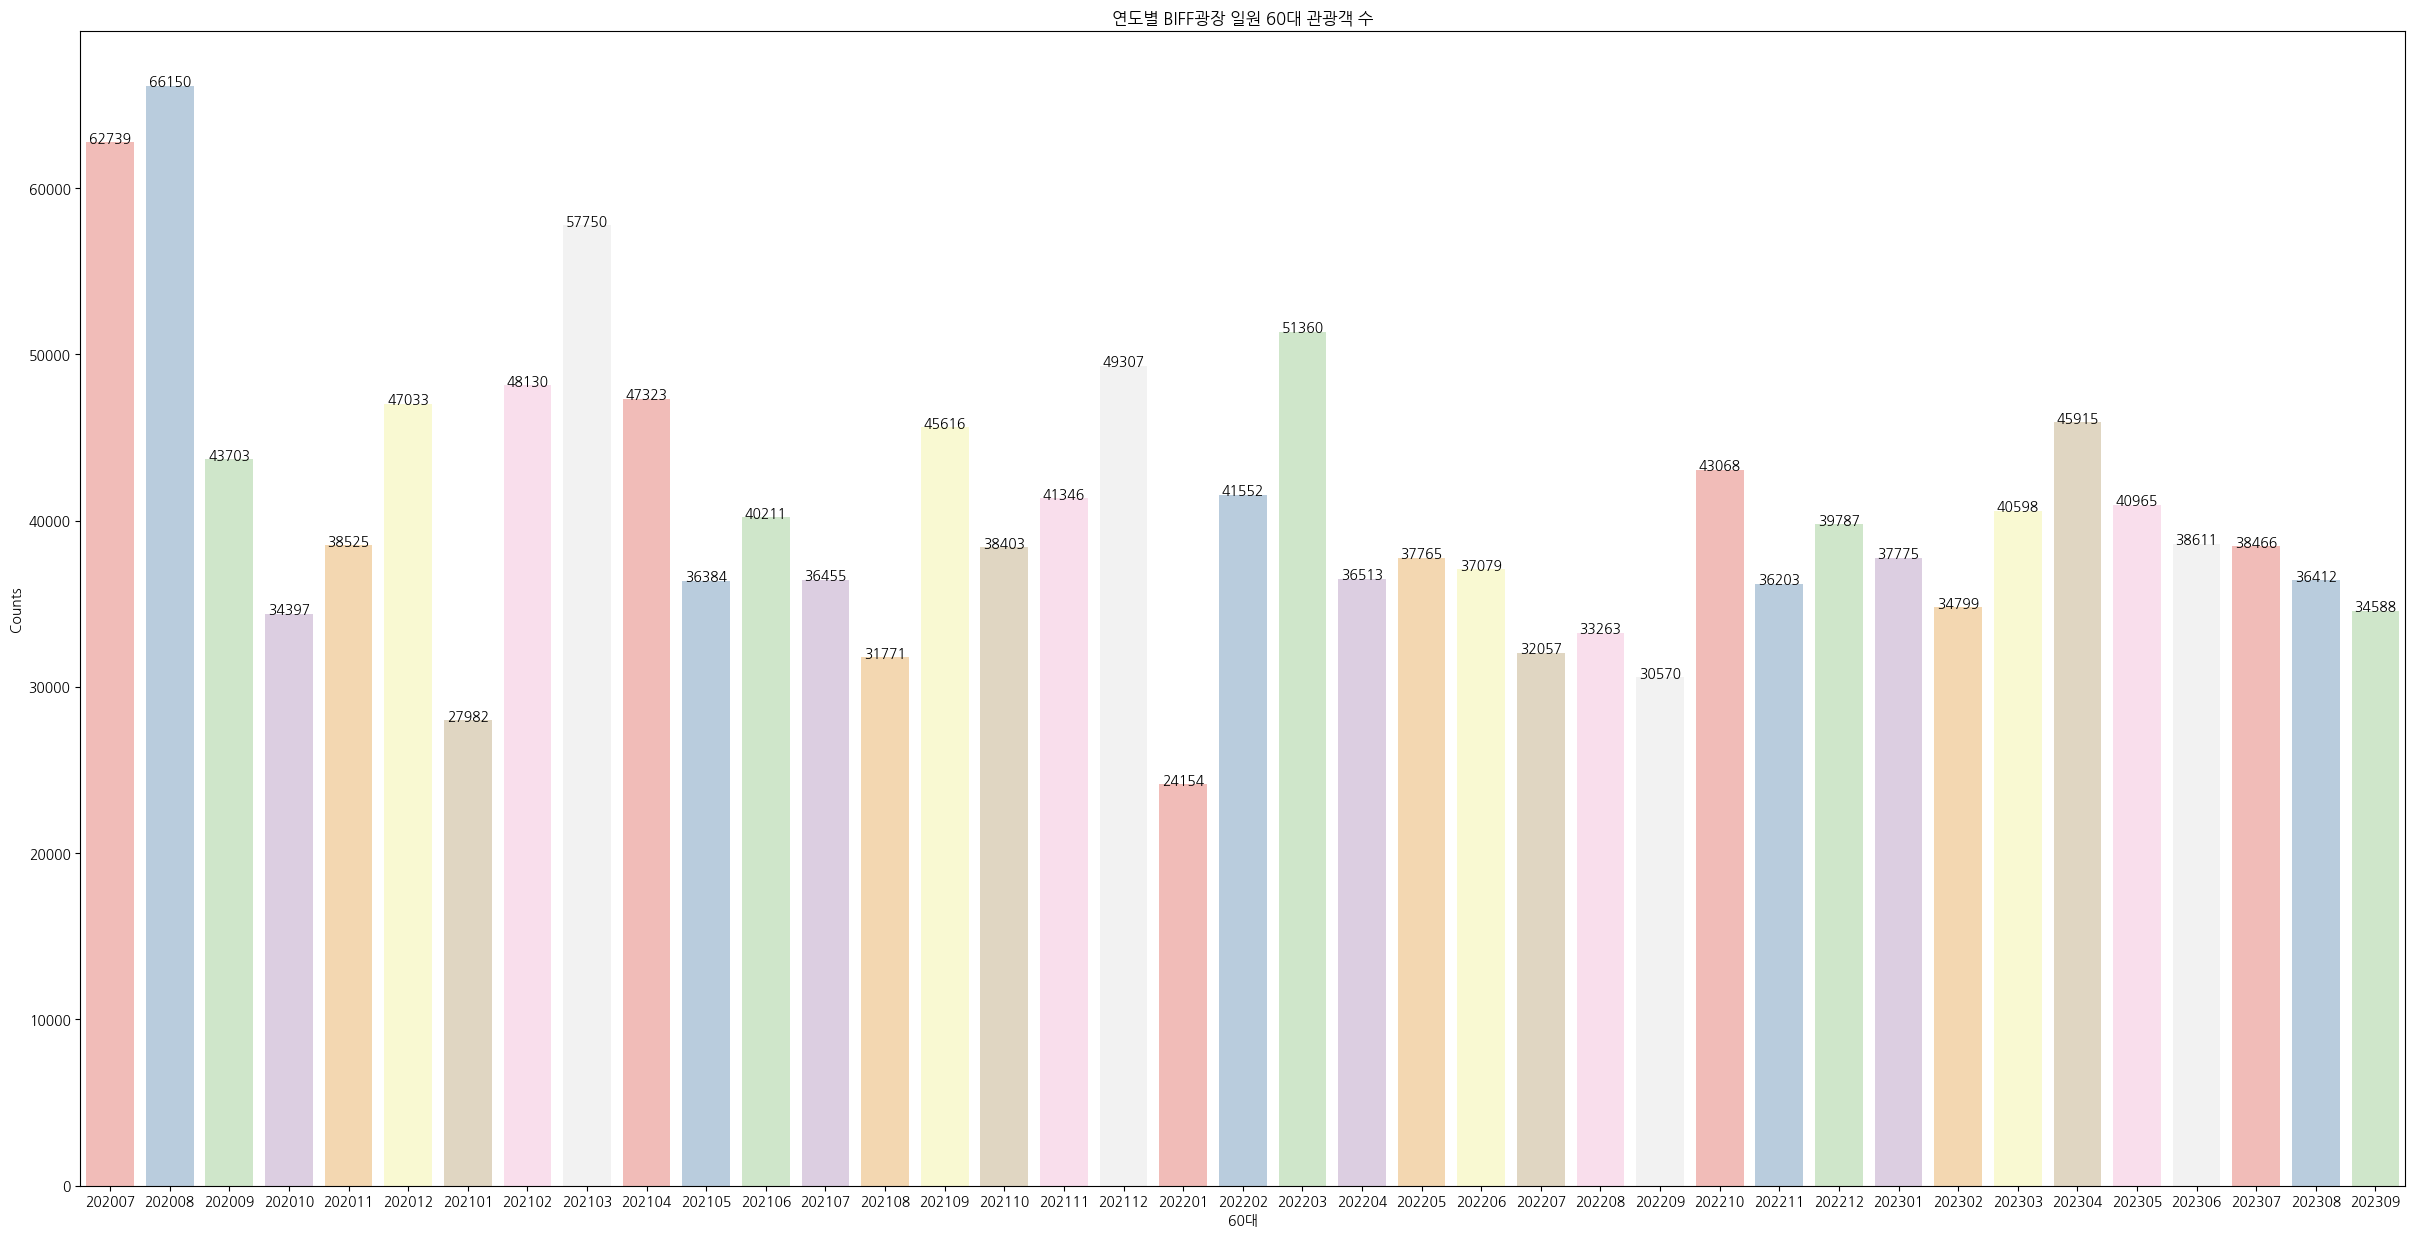

In [20]:
plot_data(0)

### 3.6 계절적 패턴 확인

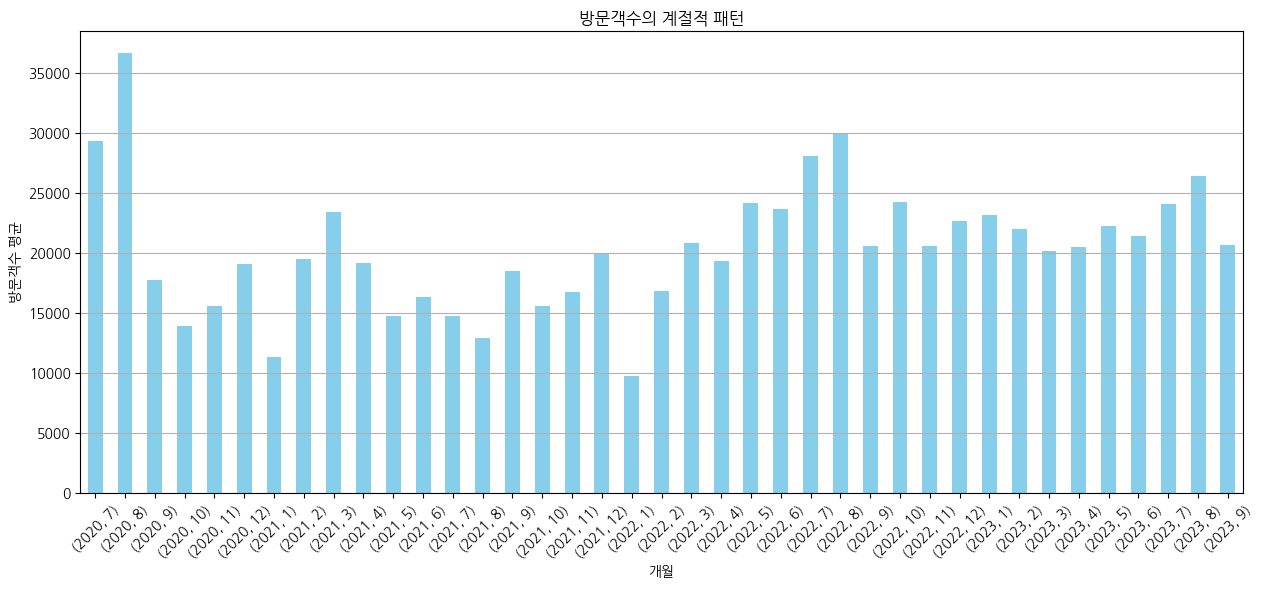

In [21]:
# 연도와 월 정보를 추출하여 새로운 컬럼 생성
df['strd_yymm'] = pd.to_datetime(df['strd_yymm'], format='%Y%m').dt.to_period('M')
df['year_month'] = df['strd_yymm'].dt.strftime('%Y-%m')
df['year'] = df['strd_yymm'].dt.year
df['month'] = df['strd_yymm'].dt.month

# 월별 데이터를 연도별로 그룹화하여 평균 방문객 수 계산
df_seasonal = df.groupby(['year', 'month'])['vstr_num'].mean()

# 시각화(막대그래프)
plt.figure(figsize=(15, 6))
df_seasonal.plot(kind='bar', color='skyblue')
plt.title('방문객수의 계절적 패턴')
plt.xlabel('개월')
plt.ylabel('방문객수 평균')
plt.xticks(rotation=45)
plt.grid(axis='y');

<Figure size 1500x600 with 0 Axes>

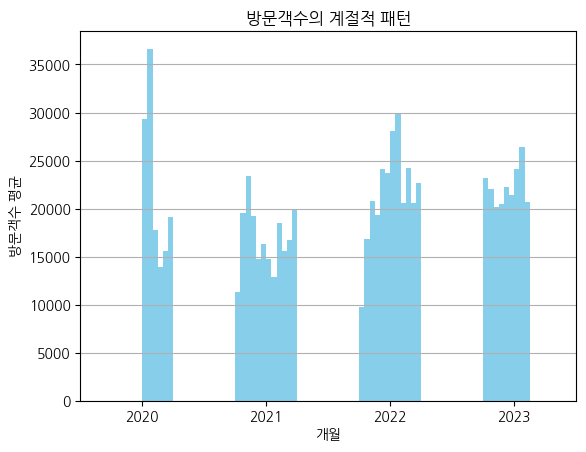

In [22]:
# 월별 데이터를 연도별로 그룹화하여 평균 방문객 수 계산
df_seasonal = df.groupby(['year', 'month'])['vstr_num'].mean().unstack()

# 시각화(막대그래프)
plt.figure(figsize=(15, 6))
df_seasonal.plot(kind='bar', color='skyblue')
plt.title('방문객수의 계절적 패턴')
plt.xlabel('개월')
plt.ylabel('방문객수 평균')
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='upper right').remove();

# 4 이상치 확인

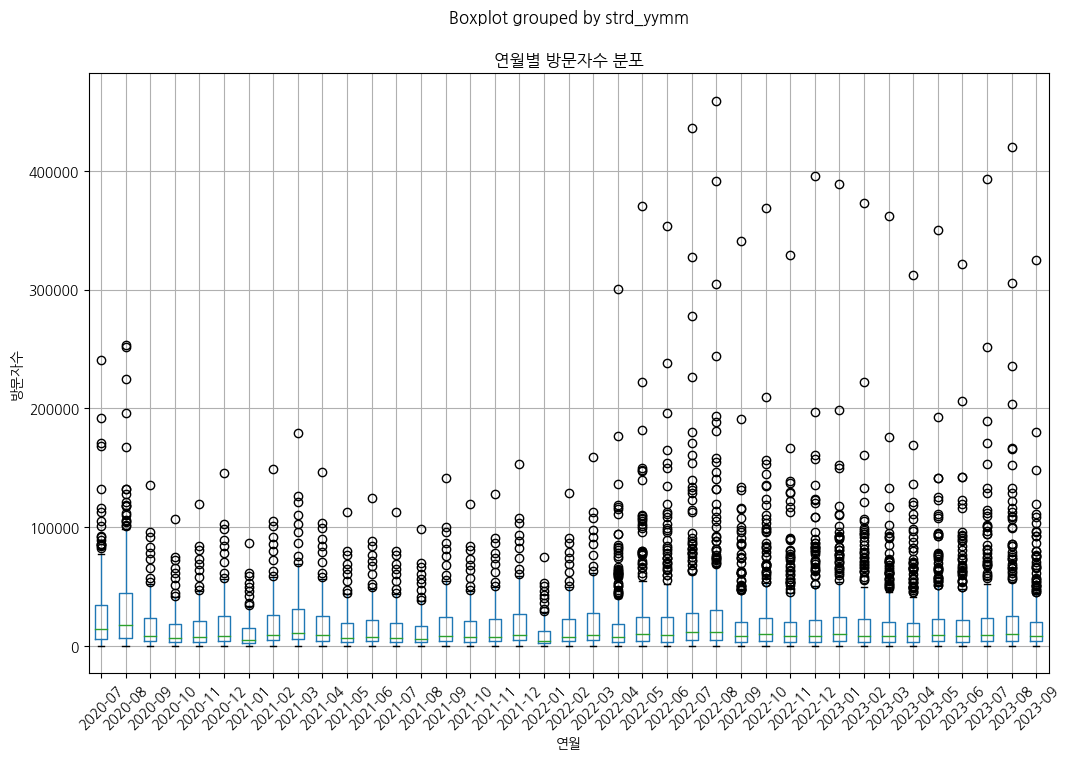

In [24]:
# boxplot 그리기
df.boxplot(column=['vstr_num'], by='strd_yymm', figsize=(12, 8))
plt.xlabel('연월')
plt.ylabel('방문자수')
plt.title('연월별 방문자수 분포')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

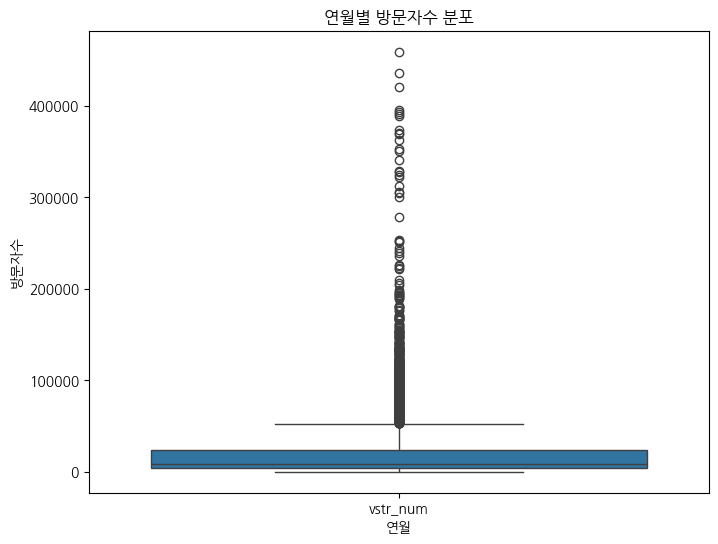

In [25]:
# 선택된 열로 새로운 데이터프레임 생성
df_xx = df[['vstr_num']]

# boxplot 그리기
plt.figure(figsize=(8, 6))
sns.boxplot(data=df_xx)
plt.title('연월별 방문자수 분포')
plt.xlabel('연월')
plt.ylabel('방문자수')
plt.show()

# 5 새로운 데이터프레임(new_df) 생성

In [26]:
# 새로운 데이터프레임을 만들기 위한 빈 딕셔너리 생성
new_data = {}

# DataFrame을 순회하면서 관광지명과 연령대를 기준으로 데이터를 합산
for index, row in df.iterrows():
    tourp_nm = row['tourp_nm']
    year = row['strd_yymm']
    age_group = row['vstr_typ_dv_val']
    visitor_num = row['vstr_num']

    # 새로운 딕셔너리에 해당 관광지명과 연령대가 없으면 새로운 키 생성
    if age_group not in new_data:
        new_data[age_group] = {}

    # 해당 관광지명과 연령대의 기존 값에 방문자수를 더함
    if tourp_nm not in new_data[age_group]:
        new_data[age_group][tourp_nm] = 0
    new_data[age_group][tourp_nm] += visitor_num

# 새로운 데이터프레임 생성
new_df = pd.DataFrame(new_data)

pd.set_option('display.max_columns', None)
new_df.T

,BIFF광장 일원,감천문화마을,광안리 해수욕장,국립해양박물관,다대포 해수욕장,달맞이고개,동백섬 일원,렛츠런파크,마린시티,민락수변공원,범어사,부산 서면,부산시민공원,센텀시티,송도 해수욕장,송정 해수욕장,아미산전망대,오륙도_이기대 갈맷길,을숙도,자갈치_국제시장,전포카페거리,태종대,해동 용궁사,해운대 해수욕장,황령산 봉수대,흰여울문화마을,임랑 해수욕장,일광 해수욕장,해리단길,청사포,낙동강생태공원,기장해변_대변항,오시리아,해운대시장,암남공원,죽성드림세트장,가덕도,부산민주공원,장림포구,장산,부산역_초량,수영사적공원_망미단길,동래온천,UN기념공원
10대,512897,84115,732500,58275,61493,200130,249980,37317,305268,185242,1657,1676738,131592,681715,149638,606759,25014,186182,113488,595061,491520,109658,99230,1099593,19566,87942,37100,110148,122679,74916,199635,39112,637202,811470,9047,16007,52548,35039,4103,10940,129506,31891,89124,61016
20대,2578781,256033,4905325,99589,295710,877111,1061379,179257,979912,1177695,8797,9521415,517046,2949802,690145,2175601,121830,604443,361509,2966548,3247724,404965,318497,4420329,83197,428839,179643,374776,483170,366002,852451,180000,1198774,3063035,83970,63826,193486,132063,23428,25161,798758,124127,354530,235137
30대,2081016,192345,2387115,109301,293181,808991,1251838,479806,1124825,945845,11852,4214173,517109,2980814,631168,2122714,156579,389173,440637,2397352,1286803,329282,541929,4427622,70115,303139,201977,454142,282823,334200,859709,167695,1624797,2403131,102117,67899,229768,102290,31052,24053,527375,112934,382652,97706
40대,1953089,229813,1306284,100792,263557,624711,1011322,659259,929509,694110,20344,2773097,466835,2292627,614646,1610862,154981,406913,401464,2153834,798806,307541,479767,3407166,68612,256569,194639,434493,171027,235645,775676,148557,1352341,1731172,80462,77471,283434,99093,25724,25494,378615,119062,338950,75541
50대,1876492,232172,1059312,69213,256313,574025,687669,611685,689694,547254,25766,2259085,410609,1639614,596082,1251541,136573,358890,360591,2133990,592467,351164,401277,2205099,72327,232417,184388,404923,143609,232150,941949,187406,877042,1230113,91587,111892,333814,106934,33253,28247,357243,105864,307644,71622
60대,1584725,179491,663821,50399,219293,436728,451411,340252,477999,357968,21914,1595618,356940,1011087,503636,800206,118712,357458,292001,1861876,399969,306216,283122,1292872,63629,197208,110124,298405,88212,180214,776362,113867,523522,642462,68709,106128,254965,104679,26759,24597,220101,93896,227128,55283


In [27]:
# 조건에 맞는 행 선택하여 합산
sum_vstr_num = df.loc[(df['tourp_nm'] == 'BIFF광장 일원') & (df['vstr_typ_dv_val'] == '10대'), 'vstr_num'].sum()

print("BIFF광장 일원, 10대의 방문자 수 합계:", sum_vstr_num)

BIFF광장 일원, 10대의 방문자 수 합계: 512897


# 6 Preprocessing

### 전처리 목록
1. tourp_dv_val 컬럼 삭제
2. 컬럼명 변경
 - strd_yymm -> date
 - tourp_nm -> location
 - vstr_tp_dv_val -> age
 - vstr_num -> tourist
3. label_encoder를 사용한 tourp_nm 데이터를 수치형으로 전처리
4. 10대, 20대 ... -> 10, 20인 수치로 전처리

In [28]:
# tourp_dv_val은 관광지 고유 ID로, 분석에 큰 의미가 없다고 판단하여 삭제하기로 결정
df.drop('tourp_dv_val', axis=1, inplace=True)

In [29]:
# 컬럼명 변경
df.rename(columns={'strd_yymm':'date'}, inplace=True)
df.rename(columns={'tourp_nm':'location'}, inplace=True)
df.rename(columns={'vstr_typ_dv_val':'age'}, inplace=True)
df.rename(columns={'vstr_num':'tourist'}, inplace=True)

In [30]:
# 라벨 인코딩을 수행할 열 선택
cols_to_encode = ['location']

# LabelEncoder 객체 생성
le = LabelEncoder()

# 선택한 열에 대해 라벨 인코딩 수행
for col in cols_to_encode:
    df[col] = le.fit_transform(df[col])

# 결과 확인
df.head()

,date,location,age,tourist,year_month,year,month
0,2020-07,0,10대,18170,2020-07,2020,7
1,2020-07,0,20대,101245,2020-07,2020,7
2,2020-07,0,30대,84004,2020-07,2020,7
3,2020-07,0,40대,82945,2020-07,2020,7
4,2020-07,0,50대,74258,2020-07,2020,7


In [31]:
# '대'를 제거하여 숫자만 추출
df['age'] = df['age'].str.replace('대', '').astype(int)

In [32]:
df.dtypes

date          period[M]
location          int64
age               int64
tourist           int64
year_month       object
year              int64
month             int64
dtype: object

In [33]:
df.head()

,date,location,age,tourist,year_month,year,month
0,2020-07,0,10,18170,2020-07,2020,7
1,2020-07,0,20,101245,2020-07,2020,7
2,2020-07,0,30,84004,2020-07,2020,7
3,2020-07,0,40,82945,2020-07,2020,7
4,2020-07,0,50,74258,2020-07,2020,7
